# Dataset Kendaraan 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

 **Loading Data To Dataframe**

In [2]:
df_kendaraan_train =  pd.read_csv('kendaraan_train.csv')
df_kendaraan_test = pd.read_csv('kendaraan_test.csv')

In [3]:
df_kendaraan_train.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [4]:
df_kendaraan_test.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0
7,Wanita,40,1,28,0,1-2 Tahun,Pernah,30981,26,79,0
8,Pria,23,1,15,1,< 1 Tahun,Tidak,32365,152,219,0
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1


**Check Shape**

In [5]:
df_kendaraan_train.shape

(285831, 12)

In [6]:
df_kendaraan_test.shape

(47639, 11)

**Check Info Dataset**

In [3]:
df_kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [8]:
df_kendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


**Check Missing Value**

In [9]:
df_kendaraan_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [10]:
df_kendaraan_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

**Bisa dilihat dataset test sudah bersih dari missing value selanjutnya akan di cek apakah ada data yang duplicate *

**Check Duplicate Value**

In [11]:
df_kendaraan_train.duplicated().sum()

0

In [12]:
df_kendaraan_test.duplicated().sum()

3

**Value Count**

** Untuk Mempersingkat kita lihat cukup satu dataset saja yang train karena yang test sama cuma tidak ada ID 

In [13]:
df_kendaraan_train['Jenis_Kelamin'].value_counts()

Pria      146678
Wanita    124713
Name: Jenis_Kelamin, dtype: int64

In [14]:
df_kendaraan_train['Umur'].value_counts()

24.0    18443
23.0    17403
22.0    14975
25.0    14634
21.0    11652
        ...  
81.0       42
82.0       20
83.0       16
84.0        9
85.0        8
Name: Umur, Length: 66, dtype: int64

In [15]:
df_kendaraan_train['SIM'].value_counts()

1.0    270843
0.0       584
Name: SIM, dtype: int64

In [16]:
df_kendaraan_train['Kode_Daerah'].value_counts()

28.0    75439
8.0     24186
46.0    14157
41.0    12931
15.0     9500
30.0     8630
29.0     7931
50.0     7349
3.0      6594
11.0     6548
36.0     6285
33.0     5459
47.0     5371
35.0     4963
6.0      4489
45.0     4009
37.0     3917
18.0     3662
48.0     3386
39.0     3384
14.0     3310
10.0     3049
21.0     3019
2.0      2961
13.0     2875
7.0      2323
12.0     2281
9.0      2213
27.0     2023
32.0     2012
43.0     1902
17.0     1866
26.0     1852
25.0     1786
24.0     1738
38.0     1448
0.0      1444
16.0     1436
31.0     1412
20.0     1394
23.0     1369
49.0     1305
4.0      1301
34.0     1188
19.0     1055
40.0      934
22.0      932
5.0       900
1.0       707
44.0      564
42.0      420
52.0      189
51.0      127
Name: Kode_Daerah, dtype: int64

In [17]:
df_kendaraan_train['Sudah_Asuransi'].value_counts()

0.0    146997
1.0    124605
Name: Sudah_Asuransi, dtype: int64

In [18]:
df_kendaraan_train['Umur_Kendaraan'].value_counts()

1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64

In [19]:
df_kendaraan_train['Kendaraan_Rusak'].value_counts()

Pernah    137123
Tidak     134520
Name: Kendaraan_Rusak, dtype: int64

In [20]:
df_kendaraan_train['Premi'].value_counts()

2630.0     46272
69856.0       98
38287.0       29
45179.0       28
30117.0       28
           ...  
76473.0        1
47889.0        1
59991.0        1
86426.0        1
69430.0        1
Name: Premi, Length: 45114, dtype: int64

In [21]:
df_kendaraan_train['Kanal_Penjualan'].value_counts()

152.0    96090
26.0     56816
124.0    52756
160.0    15436
156.0     7542
         ...  
70.0         1
79.0         1
144.0        1
33.0         1
84.0         1
Name: Kanal_Penjualan, Length: 151, dtype: int64

In [22]:
df_kendaraan_train['Lama_Berlangganan'].value_counts()

158.0    1028
126.0    1021
73.0     1021
263.0    1013
256.0    1011
         ... 
93.0      873
295.0     872
264.0     871
205.0     859
32.0      838
Name: Lama_Berlangganan, Length: 290, dtype: int64

In [23]:
df_kendaraan_train['Tertarik'].value_counts()

0    250825
1     35006
Name: Tertarik, dtype: int64

** Jika Dilihat Disini ada beberapa data yang bukan merupakan numerik oleh karena itu nanti saya akan melakukan transformasi karena klasifikasi yang saya gunakan adalah Naive Bayes

**Visualisasi Count**

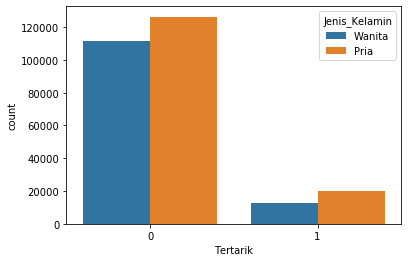

In [24]:
sn.countplot(x=df_kendaraan_train['Tertarik'],hue=df_kendaraan_train["Jenis_Kelamin"])

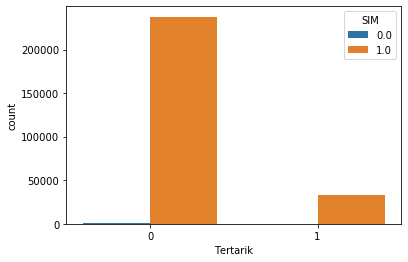

In [25]:
sn.countplot(x=df_kendaraan_train['Tertarik'],hue=df_kendaraan_train["SIM"])

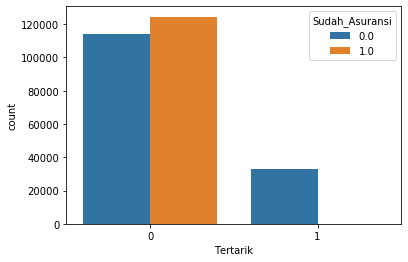

In [26]:
sn.countplot(x=df_kendaraan_train['Tertarik'],hue=df_kendaraan_train["Sudah_Asuransi"])

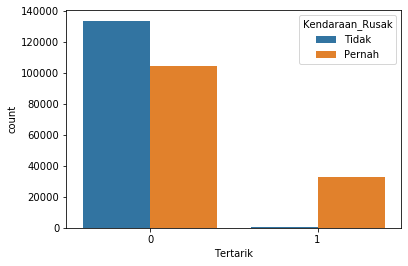

In [27]:
sn.countplot(x=df_kendaraan_train['Tertarik'],hue=df_kendaraan_train["Kendaraan_Rusak"])

**Impute Missing Value**

** Untuk Menangani Nilai Missing Akan dilakukan Replace atau Impute dengan Nilai Mean/Median/Modus , untuk tipe data non-numeric kemungkinan akan di replace hanya dengan modus saja.

In [28]:
df_kendaraan_train['Jenis_Kelamin'].fillna(df_kendaraan_train['Jenis_Kelamin'].mode().iloc[0], inplace=True)
df_kendaraan_train['Umur_Kendaraan'].fillna(df_kendaraan_train['Umur_Kendaraan'].mode().iloc[0], inplace=True)
df_kendaraan_train['Kendaraan_Rusak'].fillna(df_kendaraan_train['Kendaraan_Rusak'].mode().iloc[0], inplace=True)

In [29]:
df_kendaraan_train['Umur'].fillna(df_kendaraan_train['Umur'].mean(), inplace=True)
df_kendaraan_train['SIM'].fillna(df_kendaraan_train['SIM'].mean(), inplace=True)
df_kendaraan_train['Kode_Daerah'].fillna(df_kendaraan_train['Kode_Daerah'].mean(), inplace=True)
df_kendaraan_train['Sudah_Asuransi'].fillna(df_kendaraan_train['Sudah_Asuransi'].mean(), inplace=True)
df_kendaraan_train['Premi'].fillna(df_kendaraan_train['Premi'].mean(), inplace=True)
df_kendaraan_train['Kanal_Penjualan'].fillna(df_kendaraan_train['Kanal_Penjualan'].mean(), inplace=True)
df_kendaraan_train['Lama_Berlangganan'].fillna(df_kendaraan_train['Lama_Berlangganan'].mean(), inplace=True)

In [30]:
df_kendaraan_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

**Remove Duplicate Value**

In [31]:
df_kendaraan_train.drop_duplicates(keep=False,inplace=True)
df_kendaraan_test.drop_duplicates(keep=False,inplace=True)

In [32]:
df_kendaraan_train.duplicated().sum()

0

In [33]:
df_kendaraan_test.duplicated().sum()

0

**Data Transformation for Non-Numeric Data (not int/float)**

In [34]:
le = LabelEncoder()
df_kendaraan_train['Jenis_Kelamin'] = le.fit_transform(df_kendaraan_train['Jenis_Kelamin'])
df_kendaraan_train['Umur_Kendaraan'] = le.fit_transform(df_kendaraan_train['Umur_Kendaraan'])
df_kendaraan_train['Kendaraan_Rusak'] = le.fit_transform(df_kendaraan_train['Kendaraan_Rusak'])
df_kendaraan_test['Jenis_Kelamin'] = le.fit_transform(df_kendaraan_test['Jenis_Kelamin'])
df_kendaraan_test['Umur_Kendaraan'] = le.fit_transform(df_kendaraan_test['Umur_Kendaraan'])
df_kendaraan_test['Kendaraan_Rusak'] = le.fit_transform(df_kendaraan_test['Kendaraan_Rusak'])

In [35]:
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
2,3,0,21.0,1.0,46.0,1.0,1,1,32733.0,160.0,119.0,0
3,4,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
4,5,0,50.0,1.0,35.0,0.0,2,0,34857.0,88.0,194.0,0


In [36]:
df_kendaraan_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0


**Scalling**

In [37]:
sc = StandardScaler()
df_kendaraan_train_scaled = sc.fit_transform(df_kendaraan_train)
df_kendaraan_test_scaled = sc.fit_transform(df_kendaraan_test)

In [38]:
df_kendaraan_train = pd.DataFrame(df_kendaraan_train_scaled, columns=df_kendaraan_train.columns)
df_kendaraan_test = pd.DataFrame(df_kendaraan_test_scaled, columns= df_kendaraan_test.columns)


In [39]:
df_kendaraan_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.732045,1.136622,-0.584495,0.047651,0.510544,1.114230,0.887126,1.060576,-0.150052,0.756749,-0.701861,-0.373582
1,-1.732033,-0.879800,0.605070,0.047651,0.975056,-0.944499,2.628439,-0.942884,-0.283429,-1.571509,0.045500,-0.373582
2,-1.732021,-0.879800,-1.179278,0.047651,1.516987,1.114230,0.887126,1.060576,0.131421,0.908180,-0.432321,-0.373582
3,-1.732008,1.136622,1.265939,0.047651,1.671825,-0.944499,-0.854186,1.060576,-1.669854,0.226739,-1.118423,-0.373582
4,-1.731996,-0.879800,0.737244,0.047651,0.665382,-0.944499,2.628439,-0.942884,0.258515,-0.454702,0.486565,-0.373582


In [40]:
df_kendaraan_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.090282,0.654992,0.045637,-1.387256,-0.918553,-0.897105,-0.990784,0.938523,-1.591195,-0.112826,-0.374506
1,-0.917194,-1.081396,0.045637,1.564156,1.088669,0.836155,1.009302,0.516811,0.735135,1.034951,-0.374506
2,-0.917194,-0.952775,0.045637,0.126289,1.088669,0.836155,1.009302,4.588266,0.735135,-1.105176,-0.374506
3,-0.917194,0.462060,0.045637,-1.387256,1.088669,-0.897105,1.009302,0.323854,0.218173,-1.439944,-0.374506
4,-0.917194,-0.245358,0.045637,-0.252097,-0.918553,-0.897105,-0.990784,-0.210713,0.735135,0.891479,-0.374506


**Boxplot**

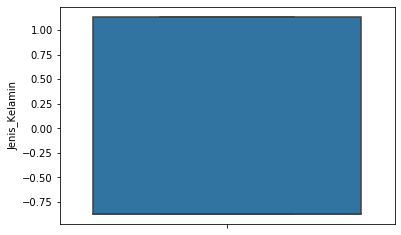

In [41]:
  sn.boxplot(y=df_kendaraan_train['Jenis_Kelamin'])

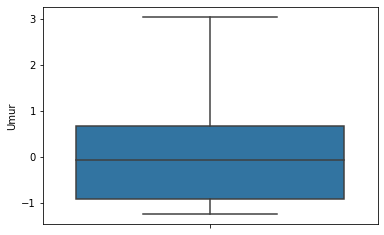

In [42]:
 sn.boxplot(y=df_kendaraan_train['Umur'])

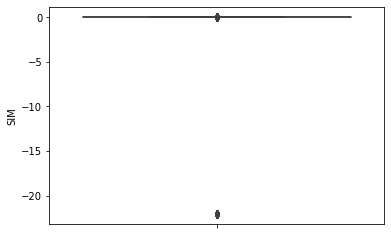

In [43]:
 sn.boxplot(y=df_kendaraan_train['SIM'])

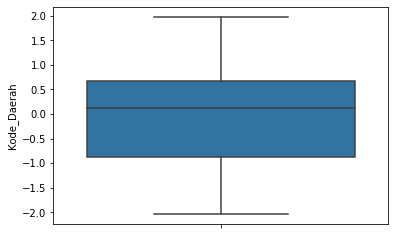

In [44]:
 sn.boxplot(y=df_kendaraan_train['Kode_Daerah'])

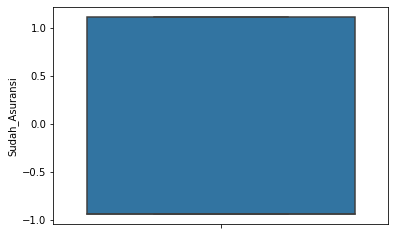

In [45]:
 sn.boxplot(y=df_kendaraan_train['Sudah_Asuransi'])

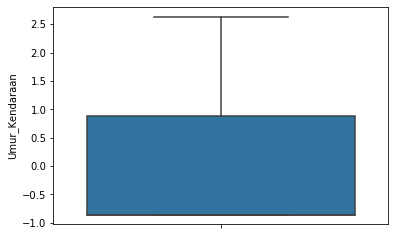

In [46]:
 sn.boxplot(y=df_kendaraan_train['Umur_Kendaraan'])

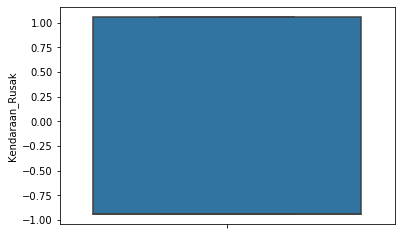

In [47]:
 sn.boxplot(y=df_kendaraan_train['Kendaraan_Rusak'])

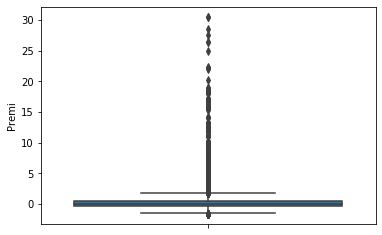

In [48]:
 sn.boxplot(y=df_kendaraan_train['Premi'])

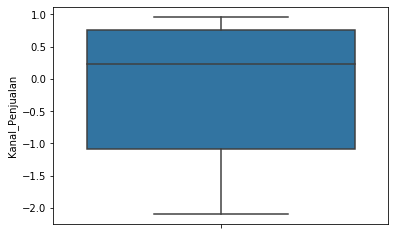

In [49]:
 sn.boxplot(y=df_kendaraan_train['Kanal_Penjualan'])

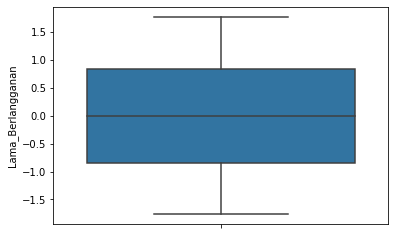

In [50]:
 sn.boxplot(y=df_kendaraan_train['Lama_Berlangganan'])

**Data Test**

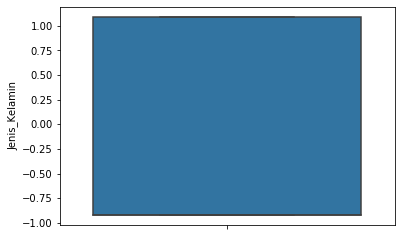

In [51]:
  sn.boxplot(y=df_kendaraan_test['Jenis_Kelamin'])

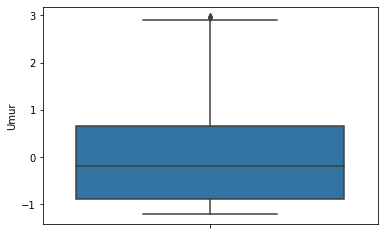

In [52]:
 sn.boxplot(y=df_kendaraan_test['Umur'])

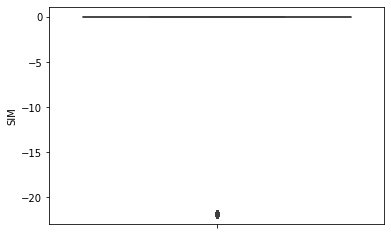

In [53]:
 sn.boxplot(y=df_kendaraan_test['SIM'])

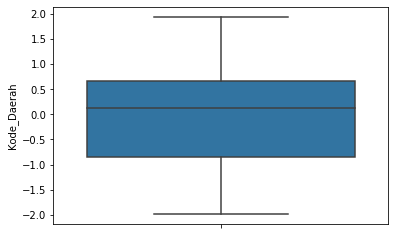

In [54]:
 sn.boxplot(y=df_kendaraan_test['Kode_Daerah'])

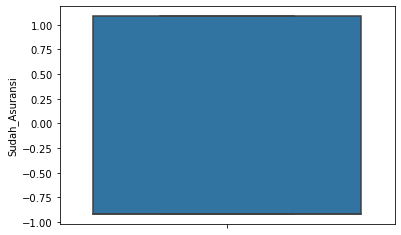

In [55]:
 sn.boxplot(y=df_kendaraan_test['Sudah_Asuransi'])

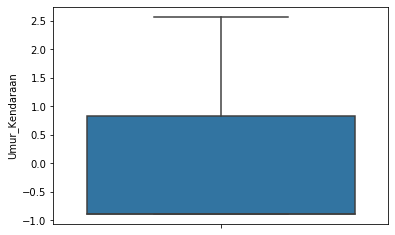

In [56]:
 sn.boxplot(y=df_kendaraan_test['Umur_Kendaraan'])

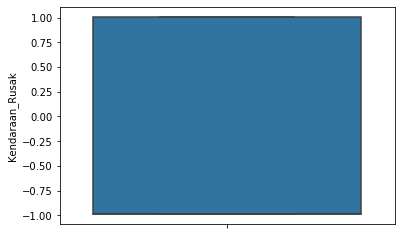

In [57]:
 sn.boxplot(y=df_kendaraan_test['Kendaraan_Rusak'])

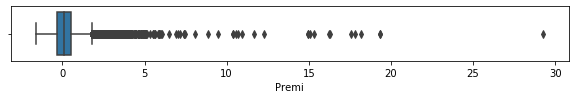

In [58]:
plt.figure(figsize=(10,1))
sn.boxplot(x=df_kendaraan_test['Premi'])

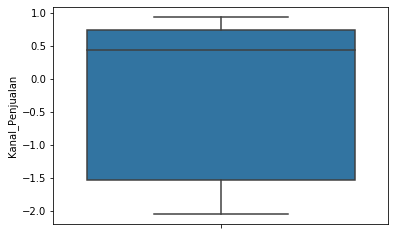

In [59]:
 sn.boxplot(y=df_kendaraan_test['Kanal_Penjualan'])

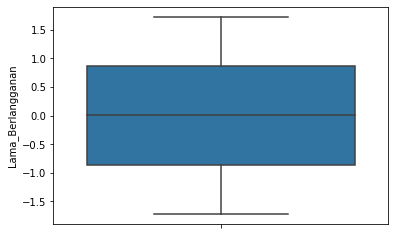

In [60]:
sn.boxplot(y=df_kendaraan_test['Lama_Berlangganan'])

**Correlation**

In [61]:
df_kendaraan_train.corr()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001226,0.001686,-0.002590,0.002060,-0.002966,0.003380,-0.002087,0.002233,-0.001462,0.000890,0.000972
Jenis_Kelamin,0.001226,1.000000,-0.135939,0.015916,-0.001444,0.075725,0.105474,0.082619,-0.004290,0.106507,0.001275,-0.051317
Umur,0.001686,-0.135939,1.000000,-0.075216,0.041433,-0.242319,-0.486777,-0.249291,0.061275,-0.548758,0.000140,0.107147
SIM,-0.002590,0.015916,-0.075216,1.000000,-0.003183,0.015200,0.029649,0.016425,-0.010708,0.041165,-0.001203,0.009343
Kode_Daerah,0.002060,-0.001444,0.041433,-0.003183,1.000000,-0.023296,-0.025976,-0.026338,-0.011278,-0.041044,-0.003460,0.009931
Sudah_Asuransi,-0.002966,0.075725,-0.242319,0.015200,-0.023296,1.000000,0.161927,0.765342,0.005609,0.210739,0.002621,-0.331952
Umur_Kendaraan,0.003380,0.105474,-0.486777,0.029649,-0.025976,0.161927,1.000000,0.158624,0.022568,0.363328,0.001878,-0.098415
Kendaraan_Rusak,-0.002087,0.082619,-0.249291,0.016425,-0.026338,0.765342,0.158624,1.000000,-0.007769,0.210145,0.001250,-0.337919
Premi,0.002233,-0.004290,0.061275,-0.010708,-0.011278,0.005609,0.022568,-0.007769,1.000000,-0.106468,-0.000710,0.023136
Kanal_Penjualan,-0.001462,0.106507,-0.548758,0.041165,-0.041044,0.210739,0.363328,0.210145,-0.106468,1.000000,0.000311,-0.137412


In [62]:
corrMatrix = df_kendaraan_train.corr()

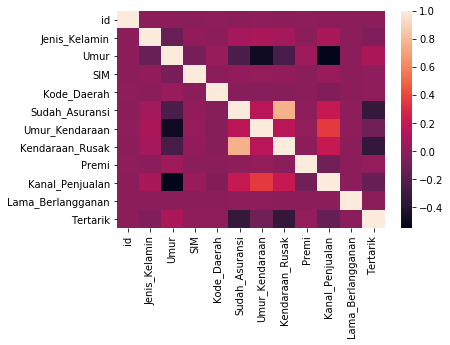

In [63]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

**Berdasarkan Data Korelasi Kemungkinan Atribut yang dapat dipilih adalah Umur, SIM, Kode_Daerah,Premi,Lama Berlangganan
Untuk ID, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak Akan Didrop

**Handling Outliers by Dropping Value With Outliers**

** Check Menggunakan IQR dan Kemudian Drop Data

In [64]:
train_Q1 = df_kendaraan_train.quantile(0.25)
train_Q3 = df_kendaraan_train.quantile(0.75)
train_IQR = train_Q3 - train_Q1
lowtrain_bound=train_Q1 - 1.5 * train_IQR
uppertrain_bound=train_Q3 + 1.5 * train_IQR
print(uppertrain_bound)

id                   3.464089
Jenis_Kelamin        4.161255
Umur                 3.050287
SIM                  0.047651
Kode_Daerah          2.987942
Sudah_Asuransi       4.202323
Umur_Kendaraan       3.499095
Kendaraan_Rusak      4.065766
Premi                1.746184
Kanal_Penjualan      3.510908
Lama_Berlangganan    3.377994
Tertarik            -0.373582
dtype: float64


In [65]:
test_Q1 = df_kendaraan_test.quantile(0.25)
test_Q3 = df_kendaraan_test.quantile(0.75)
test_IQR = test_Q3 - test_Q1
lowtest_bound=test_Q1 - 1.5 * test_IQR
uppertest_bound=test_Q3 + 1.5 * test_IQR
print(lowtest_bound)

Jenis_Kelamin       -3.928408
Umur                -3.203649
SIM                  0.045637
Kode_Daerah         -3.127832
Sudah_Asuransi      -3.929386
Umur_Kendaraan      -3.496994
Kendaraan_Rusak     -3.990913
Premi               -1.657428
Kanal_Penjualan     -4.942218
Lama_Berlangganan   -3.466489
Tertarik            -0.374506
dtype: float64


In [66]:
df_kendaraan_train = df_kendaraan_train.loc[(df_kendaraan_train['Premi'] > lowtrain_bound['Premi']) & (df_kendaraan_train['Premi'] < uppertrain_bound['Premi'])]
df_kendaraan_train.shape

(230688, 12)

In [67]:
df_kendaraan_test = df_kendaraan_test.loc[(df_kendaraan_test['Premi'] > lowtest_bound['Premi']) & (df_kendaraan_test['Premi'] < uppertest_bound['Premi'])]
df_kendaraan_test.shape

(46361, 11)

# CLASSIFICATION WITH GAUSSIAN NB

In [68]:
data_train_x = df_kendaraan_train[['Umur','SIM','Kode_Daerah','Premi','Lama_Berlangganan']].copy()
data_train_y = df_kendaraan_train['Tertarik'].copy()
data_test_x = df_kendaraan_test[['Umur','SIM','Kode_Daerah','Premi','Lama_Berlangganan']].copy()
data_test_y = df_kendaraan_test['Tertarik'].copy()

In [69]:
data_train_x = data_train_x.to_numpy()
data_train_y = data_train_y.to_numpy()
data_test_x = data_test_x.to_numpy()
data_test_y = data_test_y.to_numpy()

In [70]:
classifier = GaussianNB()
classifier.fit(data_train_x.astype(int),data_train_y.astype(int))

GaussianNB()

In [84]:
y_train_pred = classifier.predict(data_train_x)

In [71]:
y_pred = classifier.predict(data_test_x)

In [85]:
model_acc = accuracy_score(data_train_y.astype(int),y_train_pred)
print(model_acc*100)

87.60837148009432


In [72]:
acc = accuracy_score(data_test_y.astype(int), y_pred)
print(acc*100)

75.82235068268588


#  CLASSIFICATION WITH DECISION TREE

In [78]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

In [79]:
classifier = DecisionTreeClassifier(max_depth=7)
classifier.fit(data_train_x.astype(int),data_train_y.astype(int))

DecisionTreeClassifier(max_depth=7)

In [80]:
y_pred = classifier.predict(data_test_x)

In [86]:
y_train_pred = classifier.predict(data_train_x)

In [87]:
model_acc = accuracy_score(data_train_y.astype(int), y_train_pred)
print(model_acc*100)

87.60837148009432


In [81]:
acc = accuracy_score(data_test_y.astype(int), y_pred)
print(acc*100)

87.22848946312634
